<a href="https://colab.research.google.com/github/vivek09thakur/Aeromax_Predictor/blob/main/Colab%20Notebook/EchoTech_Hack_A_Thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECHO ECHO


In [ ]:
!pip install seaborn

In [ ]:
!pip install tensorflow

## Importing and Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential , load_model
from keras.layers import Dense, LSTM
from tqdm import tqdm

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/EcoTech Hackathon Dataset/air-quality-india.csv')

## Preprocessing

In [ ]:
dataframe["Timestamp"] = pd.to_datetime(dataframe["Timestamp"])

In [ ]:
dataframe['Date']=dataframe["Timestamp"].dt.date

In [ ]:
dataframe_date=pd.DataFrame(dataframe.groupby('Date')['PM2.5'].mean())

In [ ]:
dataframe_year=dataframe.loc[:,['Year','PM2.5']]

In [ ]:
datafrane_day = dataframe.loc[:,['Day','PM2.5']]

In [ ]:
dataframe_hour = dataframe.loc[:,['Hour','PM2.5']]

## Modeling

In [ ]:
new_dataframe_date = pd.DataFrame(dataframe.groupby('Date')['PM2.5'].mean())

<Axes: xlabel='Date'>

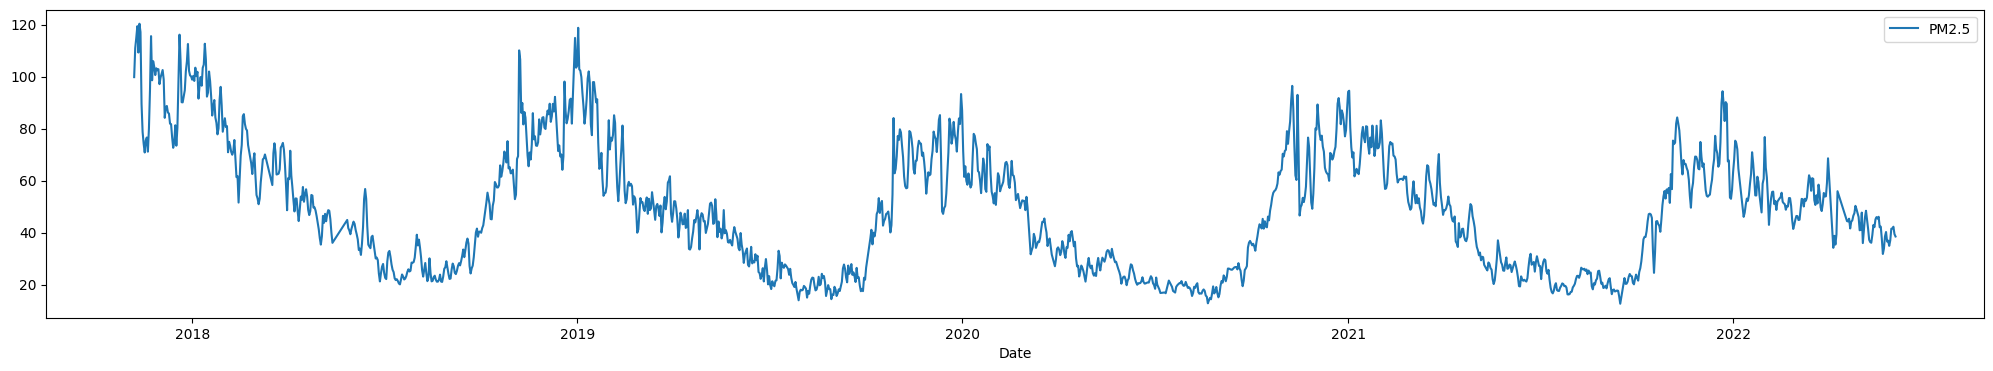

In [ ]:
new_dataframe_date.plot(figsize=(25,4))

In [ ]:
dataset = new_dataframe_date.values

In [ ]:
training_data_len = math.ceil(len(dataset)*.8)
print(training_data_len)

1293


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
print(scaled_data)

[[0.80924161]
 [0.91297267]
 [0.94951492]
 ...
 [0.27497376]
 [0.24870153]
 [0.24014526]]


In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1233, 60, 1)


### Build the model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
model.fit(x_train,y_train, batch_size=8, epochs=50)

Epoch 1/50
155/155 [==============================] - 12s 8ms/step - loss: 0.0105
Epoch 2/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 3/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0046
Epoch 4/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0042
Epoch 5/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0036
Epoch 6/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0031
Epoch 7/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 8/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 9/50
155/155 [==============================] - 2s 11ms/step - loss: 0.0026
Epoch 10/50
155/155 [==============================] - 2s 11ms/step - loss: 0.0026
Epoch 11/50
155/155 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 12/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 13/50
155/155 [=

### Making a prediction

In [ ]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

11/11 [==============================] - 2s 9ms/step


In [ ]:
train = new_dataframe_date[:training_data_len]
valid = new_dataframe_date[training_data_len:]
valid["Predictions"] = predictions
print(valid)

                PM2.5  Predictions
Date                              
2021-06-28  28.667917    24.785564
2021-06-29  30.903750    28.702208
2021-06-30  29.017917    30.387604
2021-07-01  27.166667    28.476696
2021-07-02  27.132917    27.061754
...               ...          ...
2022-05-31  41.465417    37.890865
2022-06-01  41.645833    41.859539
2022-06-02  42.255417    41.283798
2022-06-03  39.425417    41.955872
2022-06-04  38.503750    39.087681

[323 rows x 2 columns]


<ipython-input-32-a4e00b1bb660>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


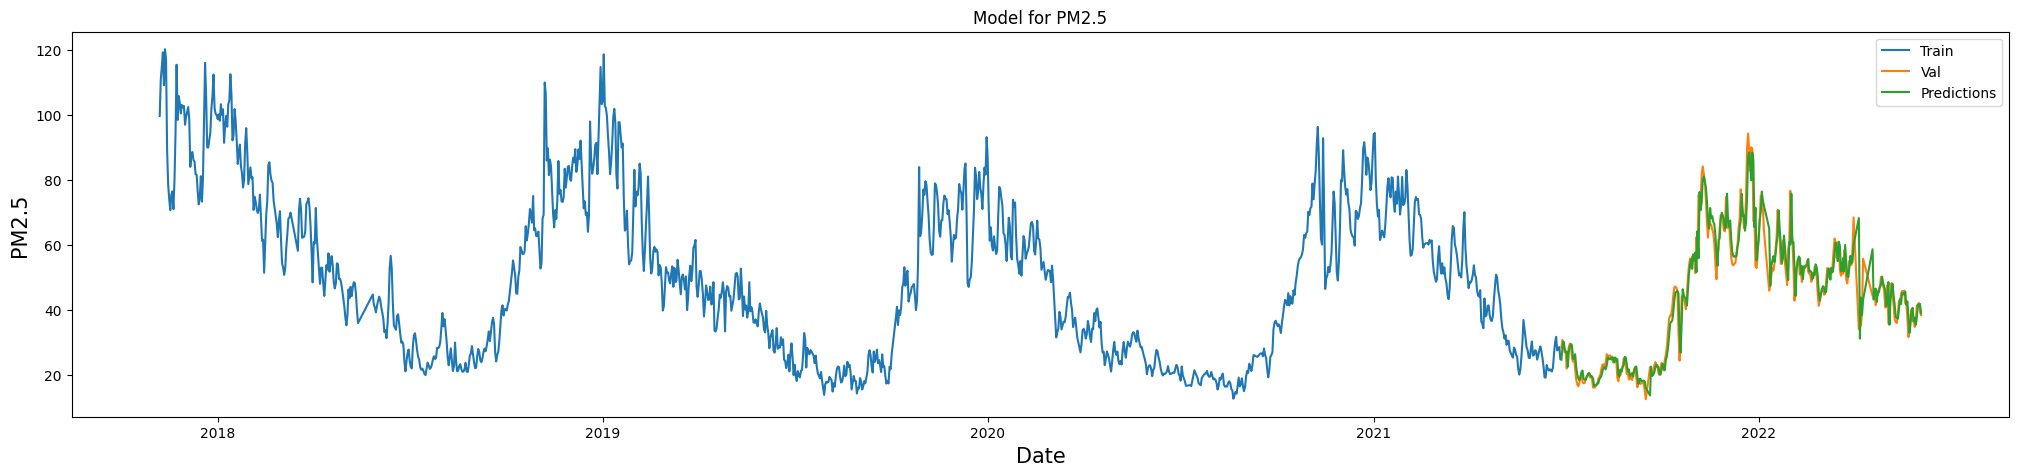

In [ ]:
plt.figure(figsize=(25,5))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(train[new_dataframe_date.columns])
plt.plot(valid['PM2.5'])
plt.plot(valid["Predictions"])
plt.legend(["Train","Val","Predictions"])